<a href="https://colab.research.google.com/github/Pnwankwo2/M92/blob/jesse/project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
# Install the required libraries
!pip install prophet

In [70]:
# Import the required libraries and dependencies
import pandas as pd
from prophet import Prophet
import datetime as dt
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats as sts

In [71]:
#Identify URL and create dataframe
df = pd.read_csv("https://stats.bis.org/api/v2/data/dataflow/BIS/WS_EER/1.0/D.N.B.US?format=csv",
    index_col='TIME_PERIOD',
    parse_dates=True
)
df

,FREQ,EER_TYPE,EER_BASKET,REF_AREA,UNIT_MEASURE,TIME_FORMAT,COLLECTION,TITLE_TS,OBS_VALUE,OBS_STATUS,OBS_CONF,OBS_PRE_BREAK
TIME_PERIOD,,,,,,,,,,,,
1996-04-11,D,N,B,US,882,NaN,A,United States - Nominal - Broad (64 economies),77.43,A,F,NaN
1996-04-12,D,N,B,US,882,NaN,A,United States - Nominal - Broad (64 economies),77.37,A,F,NaN
1996-04-13,D,N,B,US,882,NaN,A,United States - Nominal - Broad (64 economies),NaN,H,F,NaN
1996-04-14,D,N,B,US,882,NaN,A,United States - Nominal - Broad (64 economies),NaN,H,F,NaN
1996-04-15,D,N,B,US,882,NaN,A,United States - Nominal - Broad (64 economies),77.49,A,F,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-20,D,N,B,US,882,NaN,A,United States - Nominal - Broad (64 economies),104.59,A,F,NaN
2024-09-21,D,N,B,US,882,NaN,A,United States - Nominal - Broad (64 economies),NaN,H,F,NaN
2024-09-22,D,N,B,US,882,NaN,A,United States - Nominal - Broad (64 economies),NaN,H,F,NaN


In [72]:
#Drop unwanted columns
df_filtered_columns = df.drop(['FREQ','EER_TYPE','EER_BASKET','REF_AREA','UNIT_MEASURE','TIME_FORMAT','COLLECTION','TITLE_TS','OBS_STATUS','OBS_CONF','OBS_PRE_BREAK'], axis=1)
# df_filtered_columns

#Drop unwanted rows
df_filtered_rows = df_filtered_columns.dropna()
# df_filtered_rows

#rename columns
df_renamed = df_filtered_rows.rename(columns={'TIME_PERIOD':'Date', 'OBS_VALUE':'Exchange_Rate'})
# display(df_renamed.head())

#set index as the date column
# df_renamed = df_renamed.set_index('Date')


display(df_renamed.info())


# df_renamed.describe()

# df_renamed.dtypes

display(df_renamed.head())
display(df_renamed.tail())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7424 entries, 1996-04-11 to 2024-09-24
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Exchange_Rate  7424 non-null   float64
dtypes: float64(1)
memory usage: 116.0 KB


None

,Exchange_Rate
TIME_PERIOD,
1996-04-11,77.43
1996-04-12,77.37
1996-04-15,77.49
1996-04-16,77.41
1996-04-17,77.40


,Exchange_Rate
TIME_PERIOD,
2024-09-18,104.51
2024-09-19,104.39
2024-09-20,104.59
2024-09-23,104.71
2024-09-24,104.47


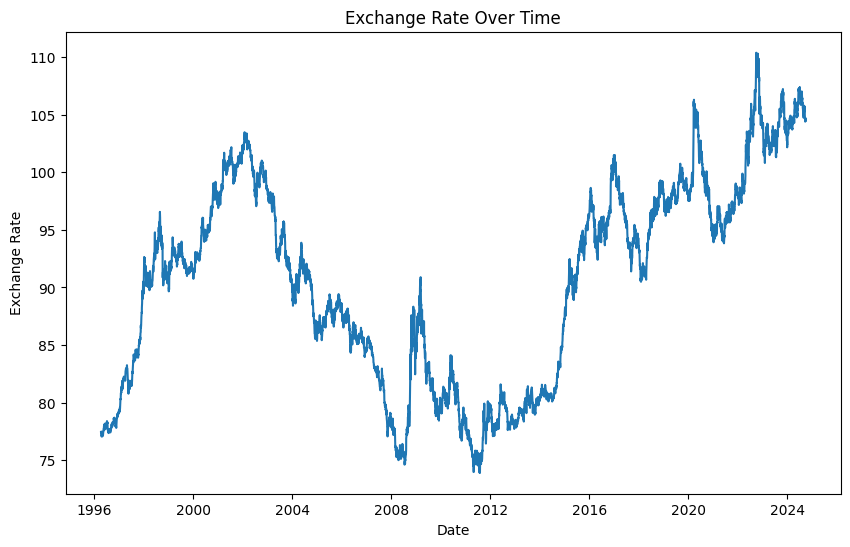

In [73]:
#exhange rate over time
plt.figure(figsize=(10,6))
plt.plot(df_renamed['Exchange_Rate'])
plt.title('Exchange Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.show()


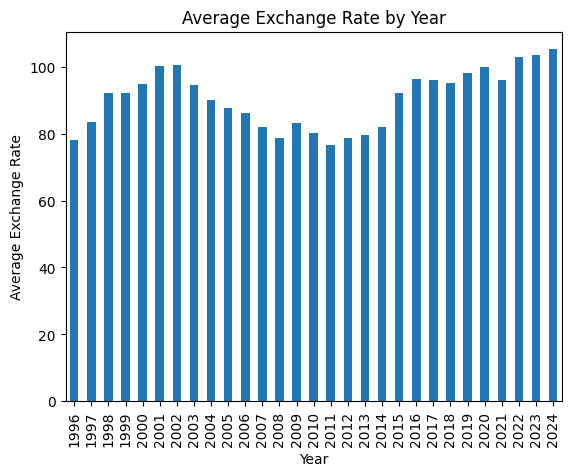

In [74]:
#average exchange rate by year
df_renamed['Year'] = df_renamed.index.year
average_exchange_rate_by_year = df_renamed.groupby('Year')['Exchange_Rate'].mean()
average_exchange_rate_by_year.plot(kind='bar')
plt.title('Average Exchange Rate by Year')
plt.xlabel('Year')
plt.ylabel('Average Exchange Rate')
plt.show()
#

In [75]:
#average exchange rate by year and month
df_renamed['Month'] = df_renamed.index.month
average_exchange_rate_by_month = df_renamed.groupby(['Year', 'Month'])['Exchange_Rate'].mean()
average_exchange_rate_by_month

Year  Month
1996  4         77.313571
      5         77.572609
      6         77.951500
      7         77.910435
      8         77.545000
                  ...    
2024  5        105.228261
      6        106.782500
      7        106.547826
      8        105.657727
      9        105.126471
Name: Exchange_Rate, Length: 342, dtype: float64

In [76]:
mean_numpy = np.mean(df_renamed['Exchange_Rate'])
print(f"The mean exchange rate is {mean_numpy}")

median_numpy = np.median(df_renamed['Exchange_Rate'])
print(f"The median exchange rate is {median_numpy}")

mode_scipy = scipy.stats.mode(df_renamed['Exchange_Rate'])
print(f"The mode exchange rate is {mode_scipy}")

std_numpy = np.std(df_renamed['Exchange_Rate'])
print(f"The standard deviation of the exchange rate is {std_numpy}")

varaince_numpy = np.var(df_renamed['Exchange_Rate'])
print(f"The variance of the exchange rate is {varaince_numpy}")

# zscore_scipy = sts.zscore(df_renamed['Exchange_Rate'])
# print(f"The z-score of the exchange rate is {zscore_scipy}")


The mean exchange rate is 90.54327451508621
The median exchange rate is 91.61
The mode exchange rate is ModeResult(mode=78.12, count=13)
The standard deviation of the exchange rate is 8.785854921373671
The variance of the exchange rate is 77.19124669942596


In [82]:

#drop Year and Month Columns
df_renamed_prophet = df_renamed.drop(['Year', 'Month'], axis=1)
df_renamed_prophet

#reset index
df_renamed_prophet = df_renamed_prophet.reset_index()
df_renamed_prophet

#rename columns
df_renamed_prophet = df_renamed_prophet.rename(columns={'TIME_PERIOD':'ds', 'Exchange_Rate':'y'})
df_renamed_prophet

display(df_renamed_prophet.head())
display(df_renamed_prophet.tail())



,ds,y
0,1996-04-11,77.43
1,1996-04-12,77.37
2,1996-04-15,77.49
3,1996-04-16,77.41
4,1996-04-17,77.40


,ds,y
7419,2024-09-18,104.51
7420,2024-09-19,104.39
7421,2024-09-20,104.59
7422,2024-09-23,104.71
7423,2024-09-24,104.47


In [88]:
#call prophet function
prophet_model = Prophet()

# Fit the time-series model.
prophet_model.fit(df_renamed_prophet)

# Make the predictions for the trend data using the df_renamed_prophet DataFrame
prophet_model_future = prophet_model.predict(prophet_model_future)
# display(prophet_model_future.tail())

# Display the first five rows of the df_renamed_prophet DataFrame
prophet_model_future[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()
display(prophet_model_future)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplyy38sip/g9_k32to.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplyy38sip/to_7rrbk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86754', 'data', 'file=/tmp/tmplyy38sip/g9_k32to.json', 'init=/tmp/tmplyy38sip/to_7rrbk.json', 'output', 'file=/tmp/tmplyy38sip/prophet_modelbuchlr8p/prophet_model-20241001011055.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:10:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:10:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1996-04-11,76.572388,74.151272,78.750952,76.572388,76.572388,-0.155029,-0.155029,-0.155029,-0.113483,-0.113483,-0.113483,-0.041547,-0.041547,-0.041547,0.0,0.0,0.0,76.417359
1,1996-04-12,76.584468,74.116816,78.622879,76.584468,76.584468,-0.155150,-0.155150,-0.155150,-0.104182,-0.104182,-0.104182,-0.050968,-0.050968,-0.050968,0.0,0.0,0.0,76.429318
2,1996-04-15,76.620708,74.079850,79.003284,76.620708,76.620708,-0.183811,-0.183811,-0.183811,-0.103664,-0.103664,-0.103664,-0.080147,-0.080147,-0.080147,0.0,0.0,0.0,76.436896
3,1996-04-16,76.632787,74.090451,78.797643,76.632787,76.632787,-0.195042,-0.195042,-0.195042,-0.105075,-0.105075,-0.105075,-0.089967,-0.089967,-0.089967,0.0,0.0,0.0,76.437746
4,1996-04-17,76.644867,74.133363,78.720530,76.644867,76.644867,-0.203264,-0.203264,-0.203264,-0.103579,-0.103579,-0.103579,-0.099686,-0.099686,-0.099686,0.0,0.0,0.0,76.441603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7519,2024-12-29,105.581155,103.302094,108.314767,105.580906,105.710491,0.113927,0.113927,0.113927,0.264991,0.264991,0.264991,-0.151064,-0.151064,-0.151064,0.0,0.0,0.0,105.695082
7520,2024-12-30,105.585151,102.962842,107.722413,105.581393,105.718790,-0.265708,-0.265708,-0.265708,-0.103664,-0.103664,-0.103664,-0.162044,-0.162044,-0.162044,0.0,0.0,0.0,105.319443
7521,2024-12-31,105.589148,102.896575,108.077630,105.585167,105.736168,-0.277562,-0.277562,-0.277562,-0.105075,-0.105075,-0.105075,-0.172486,-0.172486,-0.172486,0.0,0.0,0.0,105.311586
7522,2025-01-01,105.593145,102.895440,107.849015,105.581338,105.744249,-0.285853,-0.285853,-0.285853,-0.103579,-0.103579,-0.103579,-0.182274,-0.182274,-0.182274,0.0,0.0,0.0,105.307292


/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


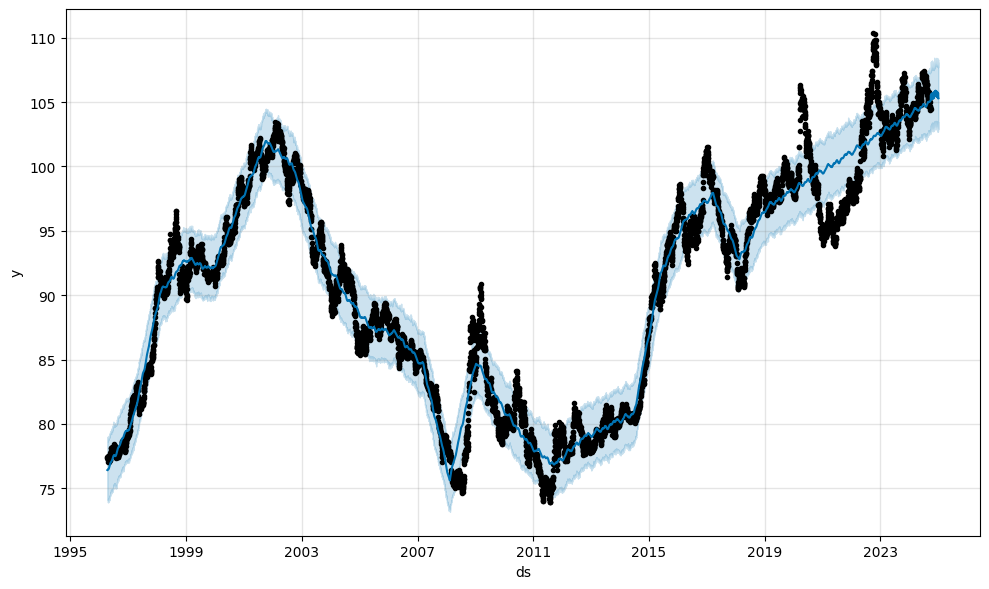

In [93]:
#plot the predictions and show each year on the x axis
prophet_model.plot(prophet_model_future)
plt.show()